  #                                               **IPL Match Winner Prediction**

## **Objectives**

- Understand the dataset and carry out preprocessing by studying key attributes like season, teams, toss details, match outcomes, and venues.  
- Explore and visualize important data patterns and trends.  
- Build predictive models using algorithms such as Logistic Regression, SVM, KNN, Decision Tree, Random Forest, and XGBoost.  
- Evaluate model performance with accuracy, precision, recall, and F1-score metrics.  
- Perform hyperparameter tuning to enhance the accuracy of the best model.  
- Select the final model with the highest performance and save it for deployment.  


### **Importing Required Libraries**

In [ ]:
# Data handling
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb # Import xgboost with alias xgb
import warnings
warnings.filterwarnings('ignore')
# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Saving model
import joblib

# **Data Loading and Understanding**


In [ ]:
data = pd.read_csv(r"/content/ipl_matches.csv")

#  **info()** is used For Infromation Of DataSet

In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Season                 756 non-null    int64 
 1   city                   756 non-null    int64 
 2   date                   756 non-null    object
 3   team1                  756 non-null    int64 
 4   team2                  756 non-null    int64 
 5   toss_winner            756 non-null    int64 
 6   toss_decision          756 non-null    int64 
 7   result                 756 non-null    int64 
 8   dl_applied             756 non-null    int64 
 9   winner                 756 non-null    int64 
 10  win_by_runs            756 non-null    int64 
 11  win_by_wickets         756 non-null    int64 
 12  player_of_match        756 non-null    int64 
 13  venue                  756 non-null    int64 
 14  umpires                756 non-null    int64 
 15  toss_and_match_winner  

# **nunique()** is used For Unique Values Count

In [ ]:
ipl.nunique()

,0
Season,12
city,32
date,546
team1,15
team2,15
toss_winner,15
toss_decision,2
result,3
dl_applied,2
winner,15


# **isnull()** is used For Check Null Values And Count Of Null Values

In [ ]:
ipl.isnull().sum()

,0
Season,0
city,0
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0
winner,0


# Handling Missing Values

In [ ]:
ipl['city'].fillna(ipl['city'].mode()[0],inplace=True)
ipl['winner'].fillna(ipl['winner'].mode()[0],inplace=True)
ipl['player_of_match'].fillna(ipl['player_of_match'].mode()[0],inplace=True)

###  Filling Missing Values

- Some columns like **city**, **winner**, **player_of_match**, **umpire1**, and **umpire2** had empty values.  
- We filled these empty spots with the **most common value** in each column, so no rows were removed.  


# Dropping Unnecessary Columns

In [ ]:
ipl =ipl.drop(columns=[])
#"team1","team2"])

In [ ]:
ipl

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpires,toss_and_match_winner
0,9,14,407,14,13,13,1,1,0,14,35,0,224,28,27,False
1,9,26,408,8,11,11,1,1,0,11,0,7,199,21,3,True
2,9,28,409,4,7,7,1,1,0,7,0,10,34,31,238,True
3,9,15,410,11,5,5,1,1,0,5,0,6,61,13,7,True
4,9,2,410,13,3,13,0,1,0,13,15,0,99,17,145,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11,23,541,7,8,8,1,1,0,8,0,9,64,40,229,True
752,11,8,542,0,8,0,0,1,0,8,0,6,22,18,232,False
753,11,31,543,14,2,2,1,1,0,2,0,2,170,0,145,True
754,11,31,544,2,0,0,1,1,0,0,0,6,55,0,323,True


In [ ]:
ipl.shape

(756, 16)

# Checking for Duplicate Rows

In [ ]:
duplicates = ipl[ipl.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Season, city, date, team1, team2, toss_winner, toss_decision, result, dl_applied, winner, win_by_runs, win_by_wickets, player_of_match, venue, umpires, toss_and_match_winner]
Index: []


### Insights
- The IPL dataset does not contain any duplicate rows.  


### **describe()** is used to provides summary statistics for numeric columns.

In [ ]:
ipl.describe()

,Season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpires
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,5.444444,14.724868,6.907407,6.976190,6.707672,0.612434,1.006614,0.025132,6.915344,13.283069,3.350529,110.247354,21.171958,157.986772
std,3.366895,8.279455,4.447712,4.279873,4.333818,0.487517,0.131052,0.156630,4.412292,23.471144,3.387963,70.687885,11.381154,97.615287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,3.000000,3.000000,3.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,42.000000,9.000000,73.000000
50%,5.000000,14.000000,7.000000,7.000000,7.000000,1.000000,1.000000,0.000000,7.000000,0.000000,4.000000,105.500000,20.000000,153.000000
75%,8.000000,23.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,10.000000,19.000000,6.000000,174.250000,30.000000,244.000000
max,11.000000,31.000000,14.000000,14.000000,14.000000,1.000000,2.000000,1.000000,14.000000,146.000000,10.000000,225.000000,40.000000,342.000000


In [ ]:
ipl.dtypes

,0
Season,int64
city,int64
date,object
team1,int64
team2,int64
toss_winner,int64
toss_decision,int64
result,int64
dl_applied,int64
winner,int64


# **Checking for outliers**

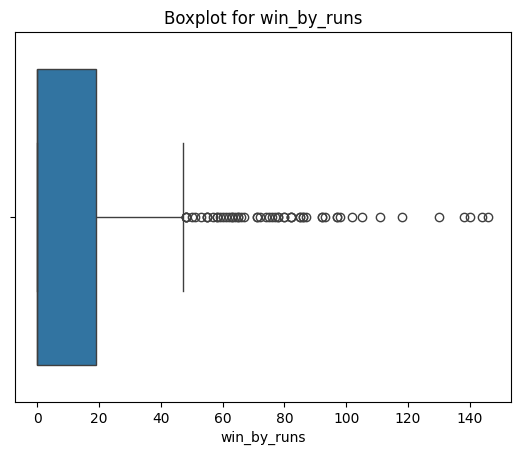

In [ ]:
sns.boxplot(x=ipl['win_by_runs'])
plt.title('Boxplot for win_by_runs')
plt.show()

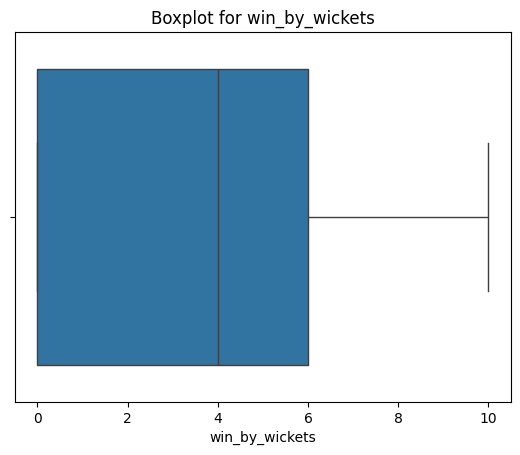

In [ ]:
sns.boxplot(x=ipl['win_by_wickets'])
plt.title('Boxplot for win_by_wickets')
plt.show()

# **Exploratory Data Analysis**

## Univariate Analysis

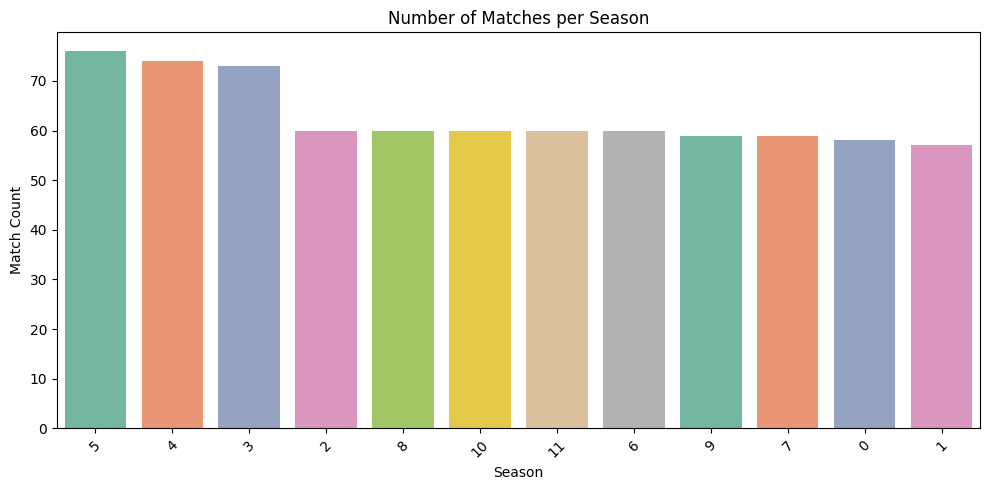

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=ipl, x='Season', order=ipl['Season'].value_counts().index, palette='Set2')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Match Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

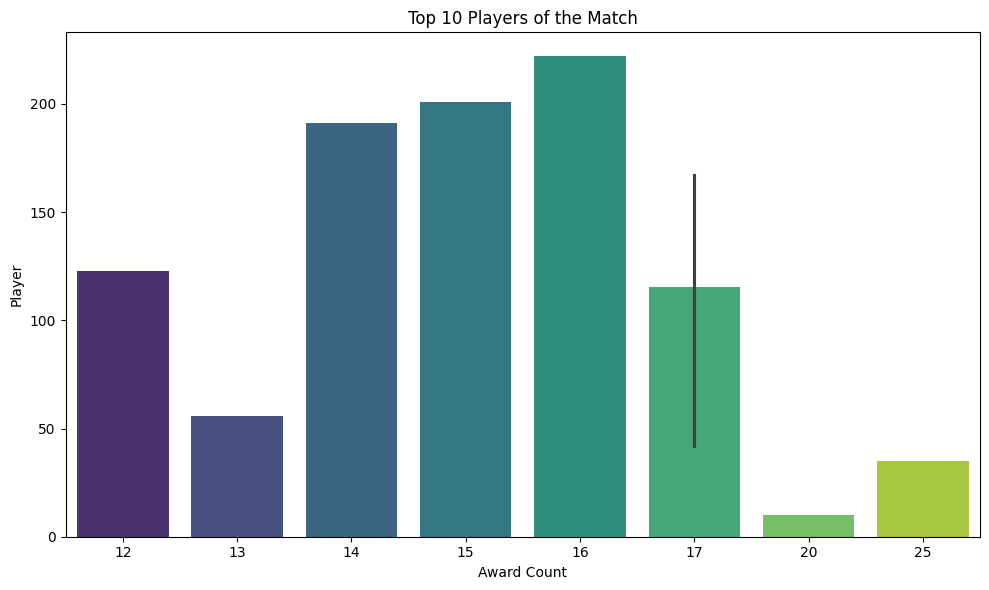

In [ ]:
plt.figure(figsize=(10, 6))
top10 = ipl['player_of_match'].value_counts().nlargest(10)
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title('Top 10 Players of the Match')
plt.xlabel('Award Count')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

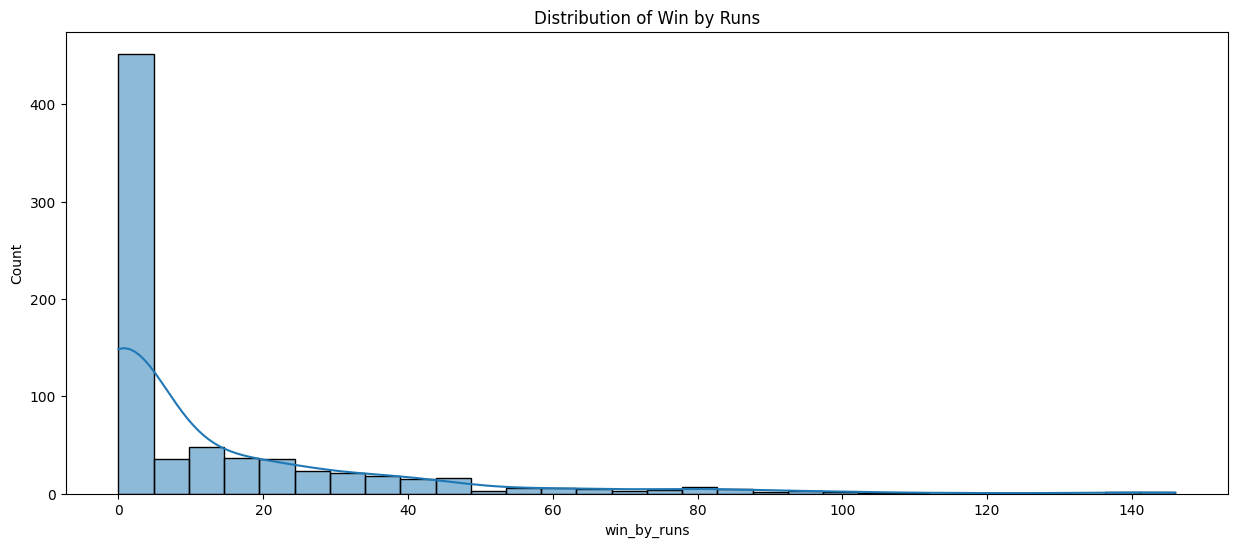

In [ ]:
# Distribution of Win by Runs
plt.figure(figsize=(15,6))
sns.histplot(ipl['win_by_runs'], kde=True, bins=30)
plt.title('Distribution of Win by Runs')
plt.show()

## Bi-Variate Analysis

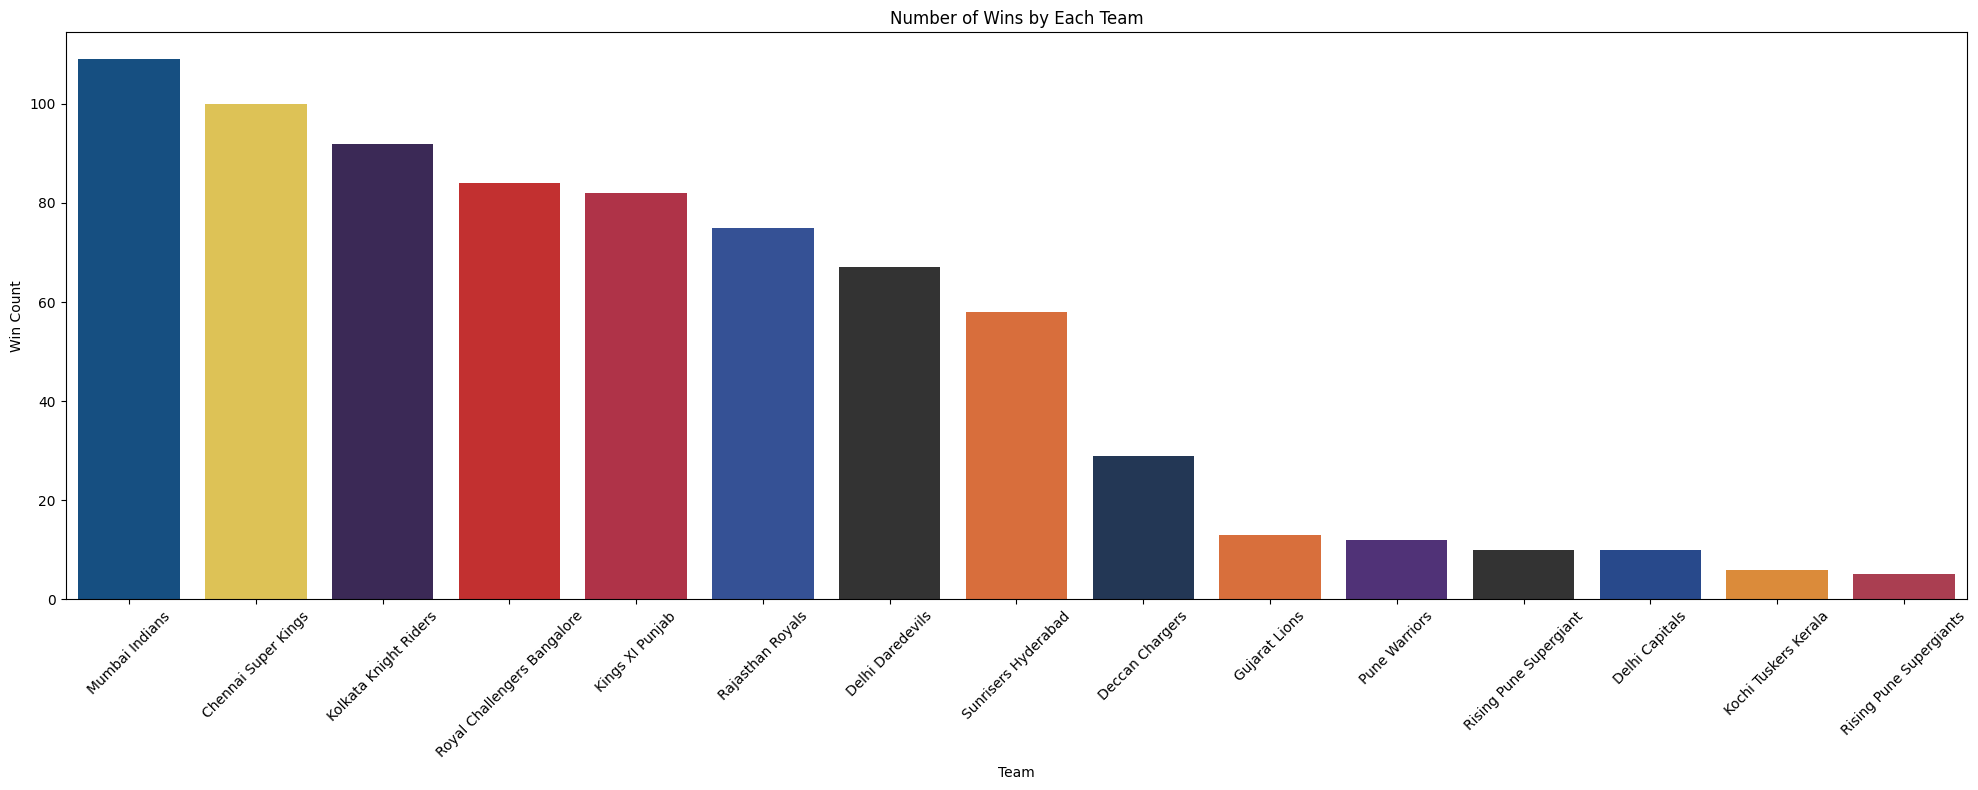

In [ ]:
# Define final team color palette
ipl_colors = {
    'Mumbai Indians': '#045093',
    'Chennai Super Kings': '#F4D03F',
    'Kolkata Knight Riders': '#3A225D',
    'Royal Challengers Bangalore': '#DA1818',
    'Kings XI Punjab': '#C41E3A',
    'Rajasthan Royals': '#254AA5',
    'Delhi Capitals': '#17449B',
    'Sunrisers Hyderabad': '#F26522',
    'Deccan Chargers': '#1B365D',
    'Gujarat Lions': '#F26622',
    'Pune Warriors': '#4F2683',
    'Rising Pune Supergiants': '#BC2C45',
    'Kochi Tuskers Kerala': '#F68B1F'
}

# Order by win count
team_order = data['winner'].value_counts().index.tolist()

# Build palette in order
palette = [ipl_colors.get(team, '#333333') for team in team_order]

# Plot
plt.figure(figsize=(20, 8))
sns.countplot(x='winner', data=data, order=team_order, palette=palette)
plt.title('Number of Wins by Each Team')
plt.xlabel('Team')
plt.ylabel('Win Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

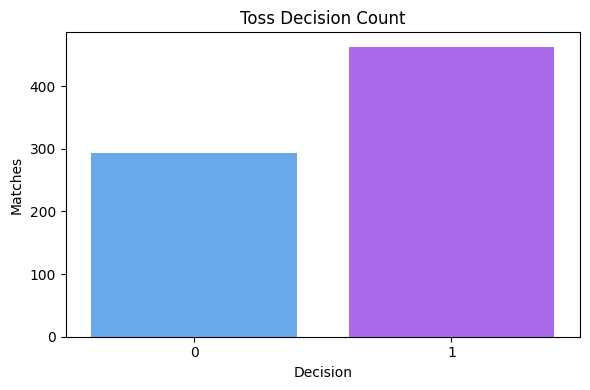

In [ ]:
# Toss Decision vs Matches
plt.figure(figsize=(6,4))
sns.countplot(data=ipl, x='toss_decision', palette='cool')
plt.title('Toss Decision Count')
plt.xlabel('Decision')
plt.ylabel('Matches')
plt.tight_layout()
plt.show()

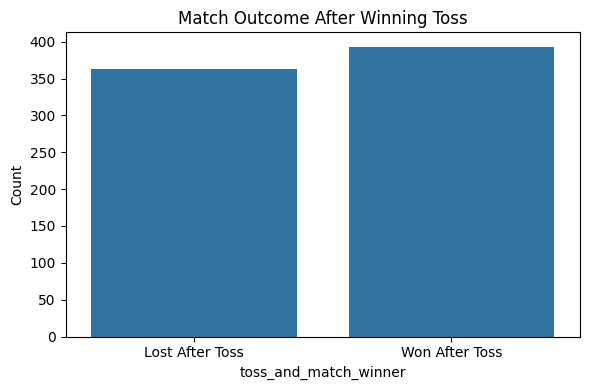

In [ ]:
# Does Toss Win Help?
ipl['toss_and_match_winner'] = ipl['toss_winner'] == ipl['winner']
plt.figure(figsize=(6,4))
sns.countplot(x=ipl['toss_and_match_winner'])
plt.xticks([0,1], ['Lost After Toss','Won After Toss'])
plt.title('Match Outcome After Winning Toss')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Multivariant Analysis

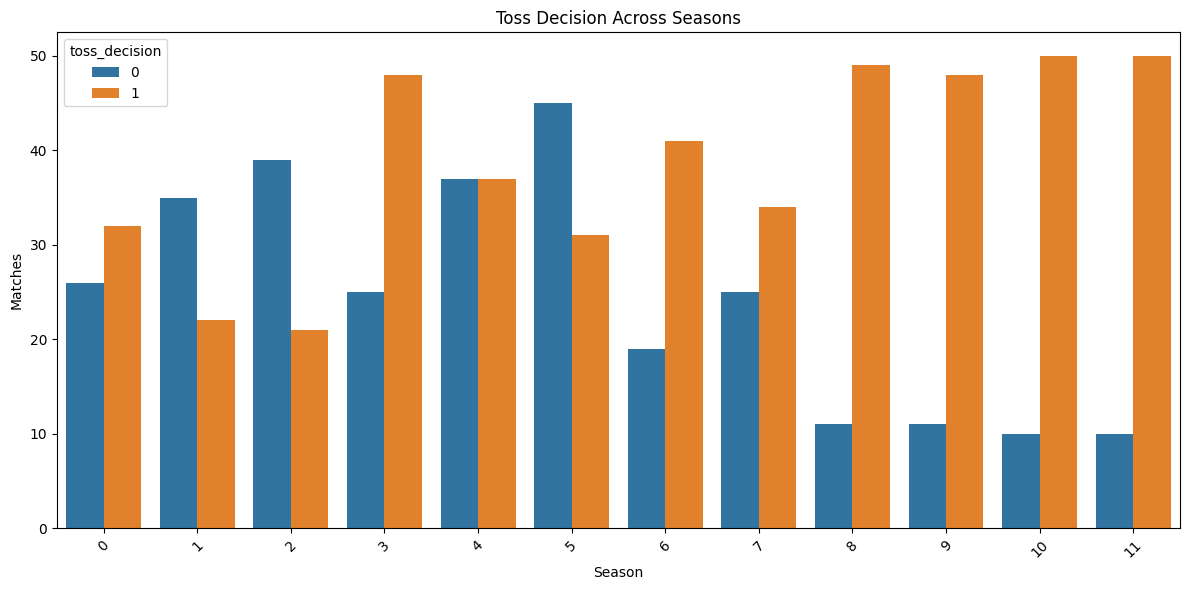

In [ ]:
# Toss Decision by Season
plt.figure(figsize=(12,6))
sns.countplot(data=ipl, x='Season', hue='toss_decision')
plt.title('Toss Decision Across Seasons')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

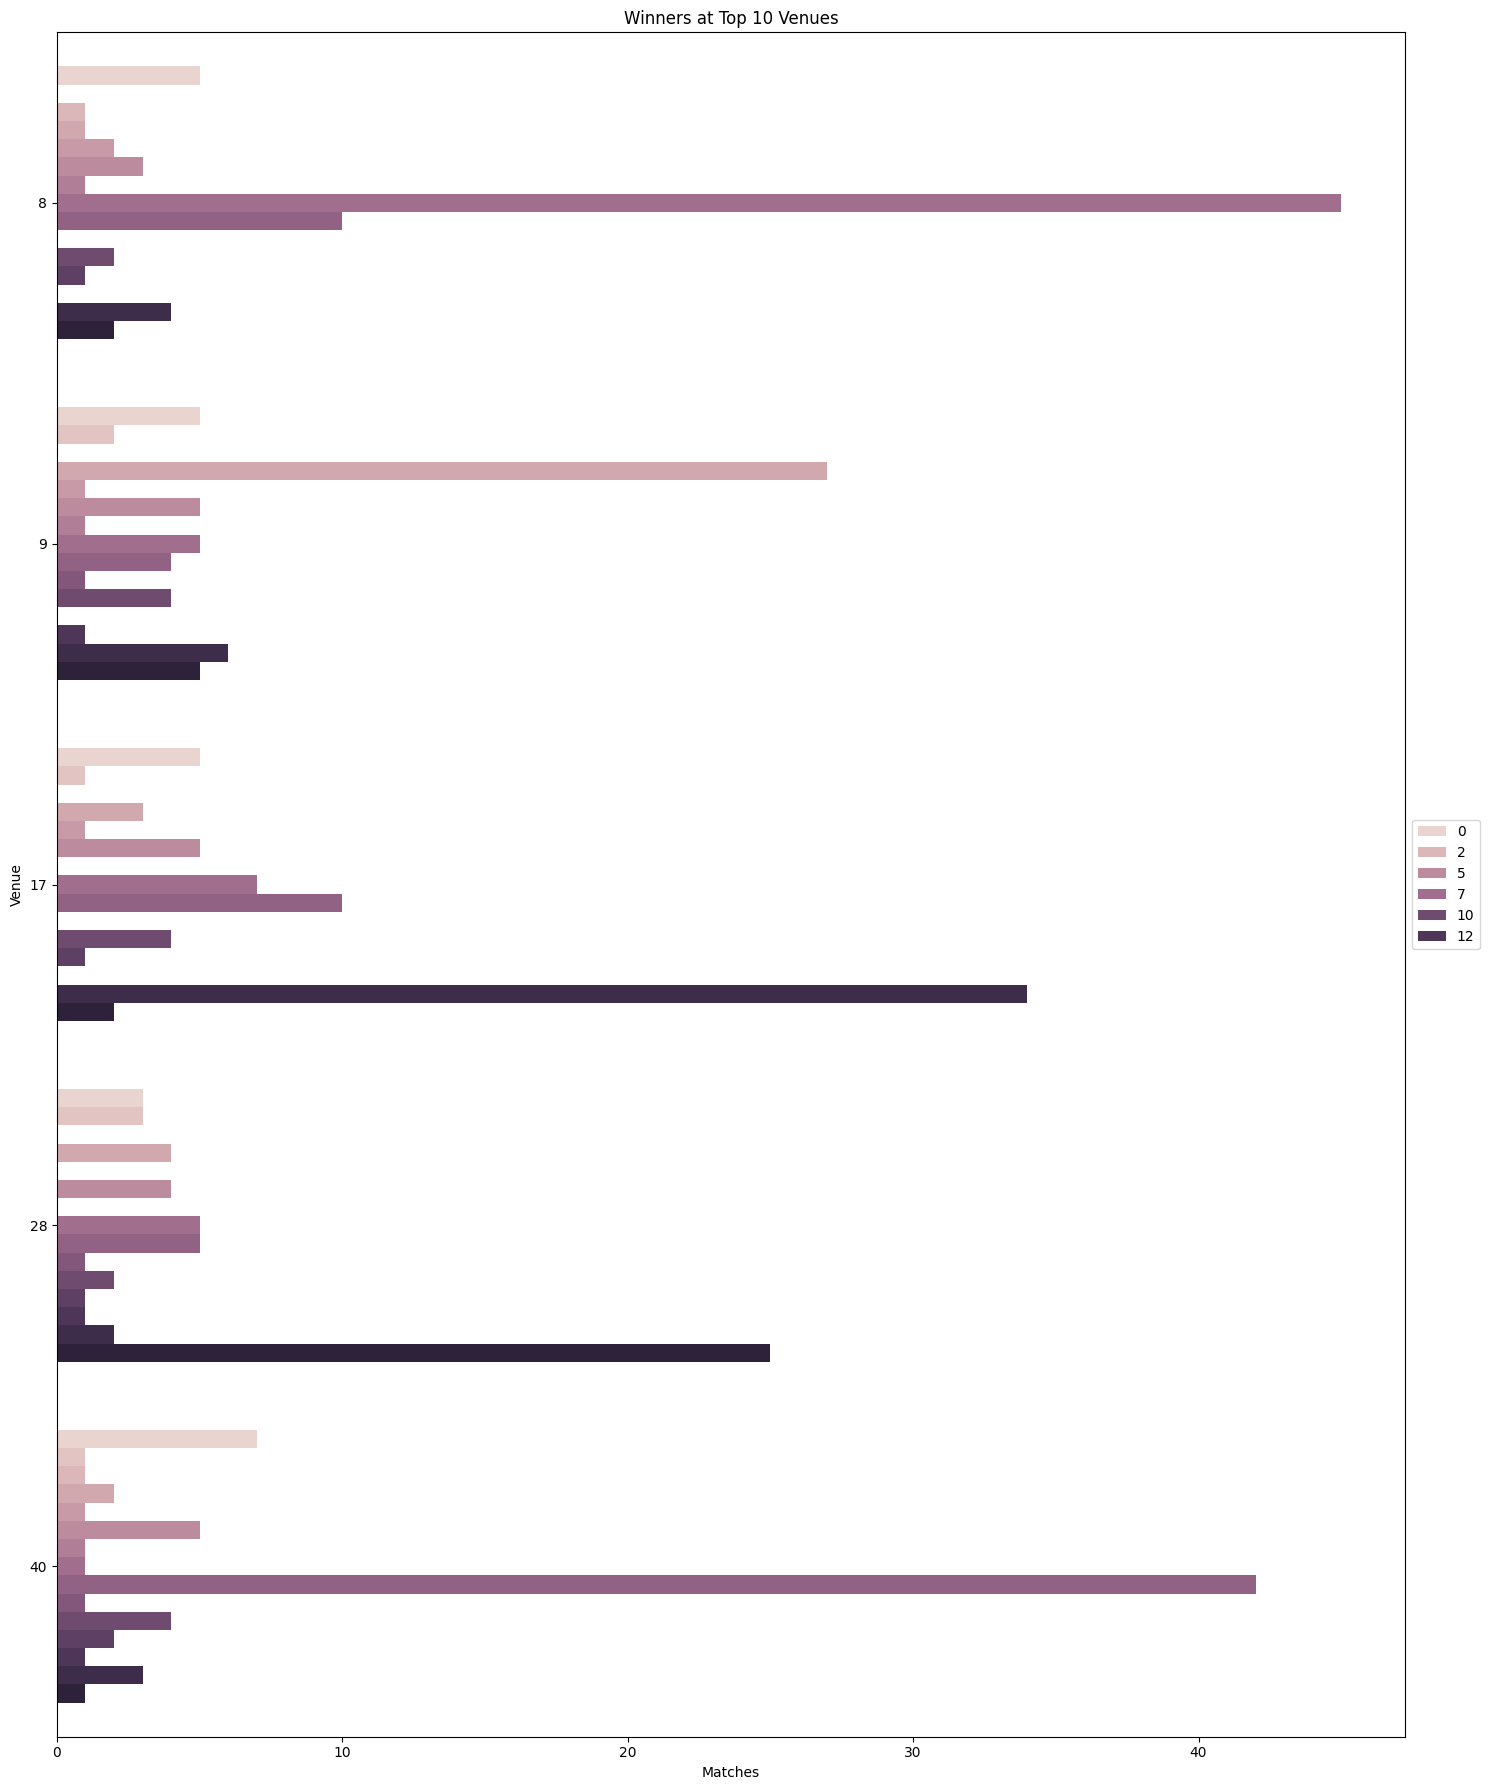

In [ ]:
# Winners at Top 10 Venues
top_venues = ipl['venue'].value_counts().nlargest(5).index

plt.figure(figsize=(15,18))
sns.countplot(
    data=ipl[ipl['venue'].isin(top_venues)],   # <-- correct filter
    y='venue',
    hue='winner'
)
plt.title('Winners at Top 10 Venues')
plt.xlabel('Matches')
plt.ylabel('Venue')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.show()

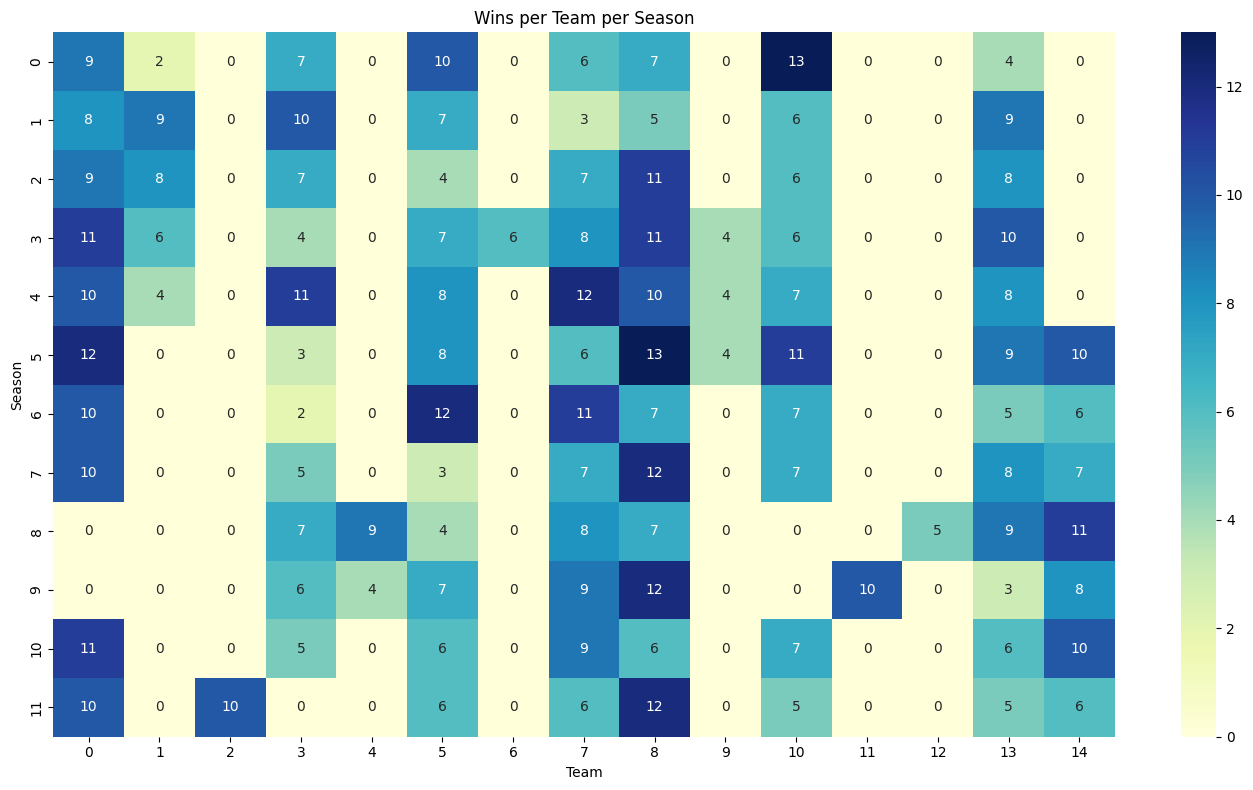

In [ ]:
# Heatmap of Wins per Team per Season
heat = ipl.groupby(['Season','winner']).size().unstack(fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(heat, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Wins per Team per Season')
plt.xlabel('Team')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

# **Training Models**

### Train_test_split

In [ ]:
# Convert categorical columns into numbers
ipl_encoded = pd.get_dummies(ipl, drop_first=True)
# Features and target
X = ipl_encoded.drop(["winner", "date", "umpires"], axis=1, errors="ignore")
y = ipl_encoded["winner"]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X.head())
print(y.head())

   Season  city  team1  team2  toss_winner  toss_decision  result  dl_applied  \
0       9    14     14     13           13              1       1           0   
1       9    26      8     11           11              1       1           0   
2       9    28      4      7            7              1       1           0   
3       9    15     11      5            5              1       1           0   
4       9     2     13      3           13              0       1           0   

   win_by_runs  win_by_wickets  ...  date_90  date_91  date_92  date_93  \
0           35               0  ...    False    False    False    False   
1            0               7  ...    False    False    False    False   
2            0              10  ...    False    False    False    False   
3            0               6  ...    False    False    False    False   
4           15               0  ...    False    False    False    False   

   date_94  date_95  date_96  date_97  date_98  date_99  
0   

## Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

lr_acc = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))

Logistic Regression Accuracy: 0.0987
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.15      0.19        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       0.05      0.11      0.07         9
           4       0.00      0.00      0.00         4
           5       0.09      0.12      0.10        17
           6       0.00      0.00      0.00         0
           7       0.15      0.14      0.14        22
           8       0.13      0.21      0.16        19
           9       0.00      0.00      0.00         4
          10       0.09      0.07      0.08        14
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        12

    accuracy                           0.10       152
   macro avg       

## Support Vector Machine (SVM)

In [ ]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)

svm_acc = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, svm_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))

SVM Accuracy: 0.0658
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        22
           8       0.11      0.53      0.18        19
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        12

    accuracy                           0.07       152
   macro avg       0.01      0.04      0.01       152
weighted avg       0.01      0.07  

## KNN-(KNearstNeighbors)

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_test_scaled)

knn_acc = accuracy_score(y_test, knn_preds)
print(f"KNN Accuracy: {knn_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

KNN Accuracy: 0.2632
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.62      0.59        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         4
           5       0.15      0.18      0.16        17
           6       0.00      0.00      0.00         0
           7       0.24      0.36      0.29        22
           8       0.50      0.32      0.39        19
           9       0.00      0.00      0.00         4
          10       0.25      0.21      0.23        14
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.29      0.17      0.21        12
          14       0.33      0.17      0.22        12

    accuracy                           0.26       152
   macro avg       0.16      0.13  

## Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

Decision Tree Accuracy: 0.8750
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         4
           5       1.00      0.88      0.94        17
           6       0.00      0.00      0.00         0
           7       0.95      0.82      0.88        22
           8       0.69      0.95      0.80        19
           9       0.00      0.00      0.00         4
          10       1.00      1.00      1.00        14
          11       1.00      0.50      0.67         2
          12       1.00      0.67      0.80         3
          13       0.85      0.92      0.88        12
          14       0.73      0.67      0.70        12

    accuracy                           0.88       152
   macro avg       0.81  

## Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

Random Forest Accuracy: 0.7368
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       1.00      0.43      0.60         7
           2       0.00      0.00      0.00         1
           3       0.54      0.78      0.64         9
           4       1.00      0.50      0.67         4
           5       0.80      0.71      0.75        17
           7       0.81      0.77      0.79        22
           8       0.50      0.84      0.63        19
           9       0.00      0.00      0.00         4
          10       0.85      0.79      0.81        14
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.73      0.92      0.81        12
          14       0.88      0.58      0.70        12

    accuracy                           0.74       152
   macro avg       0.57      0.52      0.52       152
weighted avg       0.73  

## XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_preds)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))

XGBoost Accuracy: 0.9737
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        22
           8       0.95      0.95      0.95        19
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         3
          13       0.92      1.00      0.96        12
          14       0.86      1.00      0.92        12

    accuracy                           0.97       152
   macro avg       0.91      0.92      0.92       152
weighted avg       0.96      0.

# **Model Performance**

In [ ]:
# Create a DataFrame from the accuracy results dictionary
results = {
    'Logistic Regression': lr_acc,
    'SVM': svm_acc,
    'KNN': knn_acc,
    'Decision Tree': dt_acc,
    'Random Forest': rf_acc,
    'XGBoost': xgb_acc
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

print("\nModel Performance:\n", results_df)


Model Performance:
                      Accuracy
XGBoost              0.973684
Decision Tree        0.875000
Random Forest        0.736842
KNN                  0.263158
Logistic Regression  0.098684
SVM                  0.065789


## Best Performing Model

In [ ]:
best_model_name = results_df.index[0]
print(f"\nBest Performing Model: {best_model_name}")


Best Performing Model: XGBoost


## Hypertuning Best Performance Model

In [ ]:
# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7]
}

# Initialize the GridSearchCV
xgb_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    param_grid=xgb_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the model
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 150]},
             verbose=1)

In [ ]:
# Retrieve the best XGBoost model after tuning
best_xgb_model = xgb_grid.best_estimator_
print("Best XGBoost Parameters:", xgb_grid.best_params_)

Best XGBoost Parameters: {'max_depth': 3, 'n_estimators': 100}


## Checking the Tuning Model

In [ ]:
# Predict on test data
xgb_preds = best_xgb_model.predict(X_test)

In [ ]:
# Evaluate performance
xgb_acc = accuracy_score(y_test, xgb_preds)
print(f"\nTuned XGBoost Accuracy: {xgb_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))


Tuned XGBoost Accuracy: 0.9671
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        17
           7       0.96      1.00      0.98        22
           8       1.00      0.95      0.97        19
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00        14
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         3
          13       0.86      1.00      0.92        12
          14       0.86      1.00      0.92        12

    accuracy                           0.97       152
   macro avg       0.91      0.89      0.89       152
weighted avg       0.95 

In [ ]:
print(f"\nTuned XGBoost Accuracy: {xgb_acc:.4f}")


Tuned XGBoost Accuracy: 0.9671


## Save the Model

In [ ]:
# Save the tuned XGBoost model
joblib.dump(xgb_grid, "IPL_prediction_model.pkl")

['IPL_prediction_model.pkl']